Import Libraries

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


 LOAD DATASET

In [15]:
file_path = "BigBasket Products.csv"

In [17]:
df = pd.read_csv(file_path)

In [19]:
df.shape

(27555, 10)

Head

In [21]:
df.duplicated().sum()

0

In [25]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [27]:
df.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

Get Information of Data in DataFrame

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


Get Description of DataFrame

In [33]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


 measure discount on certain item

In [36]:
df['discount'] = (df['market_price'] - df['sale_price']) / df['market_price'] * 100
df['discount'] = df['discount'].round(2)




In [38]:
print(df[['product', 'market_price','sale_price','discount']])

                                                 product  market_price  \
0                 Garlic Oil - Vegetarian Capsule 500 mg         220.0   
1                                  Water Bottle - Orange         180.0   
2                         Brass Angle Deep - Plain, No.2         250.0   
3      Cereal Flip Lid Container/Storage Jar - Assort...         176.0   
4                     Creme Soft Soap - For Hands & Body         162.0   
...                                                  ...           ...   
27550         Wottagirl! Perfume Spray - Heaven, Classic         249.0   
27551                                           Rosemary          75.0   
27552                       Peri-Peri Sweet Potato Chips         200.0   
27553                          Green Tea - Pure Original         495.0   
27554                     United Dreams Go Far Deodorant         390.0   

       sale_price  discount  
0          220.00      0.00  
1          180.00      0.00  
2          119.00    

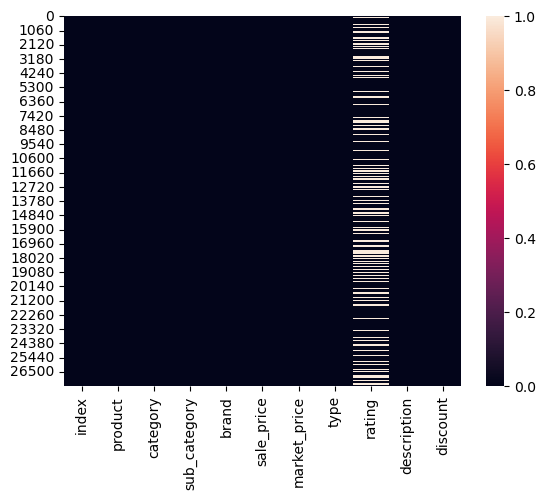

In [40]:
sns.heatmap(df.isnull())
plt.show()

Finding missing value from the dataset

In [43]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
description      115
discount           6
dtype: int64

In [45]:
missing_cols = df.columns[df.isnull().any()].tolist()
missing_cols

['product', 'brand', 'sale_price', 'rating', 'description', 'discount']

Checking null values in all columns and fill

In [48]:
df[df['product'].isna()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
14363,14364,NaN,Beverages,Coffee,Cothas Coffee,200.0,240.0,Ground Coffee,4.2,Cothas Specialty Blend Coffee and Chicory incl...,16.67


In [50]:
df.loc[df['index'] == 14364, 'product'] = "Cothas Specialty Blend Coffee and Chicory"


In [52]:
df[df['sale_price'].isna()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
1719,1720,Puja Flower Wicks - Puvvu Vathulu Batti,Cleaning & Household,Pooja Needs,Jaji,NaN,20.0,Camphor & Wicks,NaN,Jaji Puja Flower Batti / Puvvu Vathulu is made...,NaN
1720,1721,Powder - Sambar,"Foodgrains, Oil & Masala",Masalas & Spices,Annapoorna,NaN,46.0,Blended Masalas,NaN,Annaporna Spices are the preserve for Connoiss...,NaN
1721,1722,"Steel Fork - Medium, Premium Excel Series, BBCL08","Kitchen, Garden & Pets",Crockery & Cutlery,BB Home,NaN,299.0,"Cutlery, Spoon & Fork",NaN,BB Home provides fine and classy cutlery that ...,NaN
1722,1723,Snack Mix - Dhokla,Snacks & Branded Foods,Ready To Cook & Eat,MTR,NaN,65.0,Breakfast & Snack Mixes,4.1,MTR Dhokla is extremely special in Gujarat. It...,NaN
2401,2402,Battery AA 3UT Hi Top,"Kitchen, Garden & Pets",Appliances & Electricals,Nippo,NaN,150.0,Battery & Electrical,4.0,This Nippo battery incorporates state-of-the-a...,NaN
2402,2403,Klassic Plain Cocktail Napkins (22 X 22 cm),Cleaning & Household,"Disposables, Garbage Bag",Origami,NaN,32.0,Toilet Paper,3.9,Klassic Plain Cocktail Napkins (22 X 22 cm) 10...,NaN


In [54]:
df.loc[df['index'] == 1720, 'sale_price'] = 20.0
df.loc[df['index'] == 1721, 'sale_price'] = 46.0
df.loc[df['index'] == 1722, 'sale_price'] = 299.0
df.loc[df['index'] == 1723, 'sale_price'] = 65.0
df.loc[df['index'] == 2402, 'sale_price'] = 150.0
df.loc[df['index'] == 2403, 'sale_price'] = 32.0

In [56]:
df[df['brand'].isna()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
9765,9766,Food Package - Medium,Cleaning & Household,"Disposables, Garbage Bag",NaN,50.0,50.0,"Aluminium Foil, Clingwrap",NaN,NaN,0.0


In [58]:
df.loc[df['index'] == 9766, 'brand'] = "Reynolds Wrap"


In [60]:
df[df['discount'].isna()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
1719,1720,Puja Flower Wicks - Puvvu Vathulu Batti,Cleaning & Household,Pooja Needs,Jaji,20.0,20.0,Camphor & Wicks,NaN,Jaji Puja Flower Batti / Puvvu Vathulu is made...,NaN
1720,1721,Powder - Sambar,"Foodgrains, Oil & Masala",Masalas & Spices,Annapoorna,46.0,46.0,Blended Masalas,NaN,Annaporna Spices are the preserve for Connoiss...,NaN
1721,1722,"Steel Fork - Medium, Premium Excel Series, BBCL08","Kitchen, Garden & Pets",Crockery & Cutlery,BB Home,299.0,299.0,"Cutlery, Spoon & Fork",NaN,BB Home provides fine and classy cutlery that ...,NaN
1722,1723,Snack Mix - Dhokla,Snacks & Branded Foods,Ready To Cook & Eat,MTR,65.0,65.0,Breakfast & Snack Mixes,4.1,MTR Dhokla is extremely special in Gujarat. It...,NaN
2401,2402,Battery AA 3UT Hi Top,"Kitchen, Garden & Pets",Appliances & Electricals,Nippo,150.0,150.0,Battery & Electrical,4.0,This Nippo battery incorporates state-of-the-a...,NaN
2402,2403,Klassic Plain Cocktail Napkins (22 X 22 cm),Cleaning & Household,"Disposables, Garbage Bag",Origami,32.0,32.0,Toilet Paper,3.9,Klassic Plain Cocktail Napkins (22 X 22 cm) 10...,NaN


In [62]:
df.loc[df['index'] == 1720, 'discount'] = ((df.loc[df['index'] == 1720, 'market_price'] - df.loc[df['index'] == 1720, 'sale_price']) / df.loc[df['index'] == 1720, 'market_price']) * 100
df.loc[df['index'] == 1721, 'discount'] = ((df.loc[df['index'] == 1721, 'market_price'] - df.loc[df['index'] == 1721, 'sale_price']) / df.loc[df['index'] == 1721, 'market_price']) * 100
df.loc[df['index'] == 1722, 'discount'] = ((df.loc[df['index'] == 1722, 'market_price'] - df.loc[df['index'] == 1722, 'sale_price']) / df.loc[df['index'] == 1722, 'market_price']) * 100
df.loc[df['index'] == 1723, 'discount'] = ((df.loc[df['index'] == 1723, 'market_price'] - df.loc[df['index'] == 1723, 'sale_price']) / df.loc[df['index'] == 1723, 'market_price']) * 100
df.loc[df['index'] == 2402, 'discount'] = ((df.loc[df['index'] == 2402, 'market_price'] - df.loc[df['index'] == 2402, 'sale_price']) / df.loc[df['index'] == 2402, 'market_price']) * 100
df.loc[df['index'] == 2403, 'discount'] = ((df.loc[df['index'] == 2403, 'market_price'] - df.loc[df['index'] == 2403, 'sale_price']) / df.loc[df['index'] == 2403, 'market_price']) * 100

In [64]:
df[df['description'].isna()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
288,289,Arrabbiata Tomato Pasta Sauce With Chilli,Gourmet & World Food,"Sauces, Spreads & Dips",Montanini,22325.00,325.0,Mustard & Cheese Sauces,5.0,NaN,-6769.23
480,481,"Pumice Stone & Emery Foot Filer - FFL3407, Col...",Beauty & Hygiene,Bath & Hand Wash,Kaiv,175.00,175.0,Bathing Accessories,3.8,NaN,0.00
780,781,Peanut Butter - Chunky,Gourmet & World Food,"Sauces, Spreads & Dips",American Garden,299.00,299.0,"Chocolate, Peanut Spread",4.1,NaN,0.00
845,846,Squash - Sarasaparilla/Nannari/Sugandhi Root,Beverages,Fruit Juices & Drinks,NaturoBell,140.00,140.0,Syrups & Concentrates,2.5,NaN,0.00
1047,1048,"Natura Rice & Walnut Drink, Vegan",Gourmet & World Food,Drinks & Beverages,BORGES,275.01,349.0,Health Drinks,4.5,NaN,21.20
...,...,...,...,...,...,...,...,...,...,...,...
25510,25511,BBPopular Almond/Badam Californian 500gm + BBR...,"Foodgrains, Oil & Masala",Dry Fruits,bb Combo,443.00,725.0,Almonds,NaN,NaN,38.90
25583,25584,Chai/Chai/Tea/ Coffee Bone China Microwave Ser...,"Kitchen, Garden & Pets",Crockery & Cutlery,BP Bharat,269.00,373.0,"Cups, Mugs & Tumblers",2.5,NaN,27.88
26116,26117,"Tea Strainer - Stainless Steel, Medium","Kitchen, Garden & Pets",Kitchen Accessories,Ritu,99.00,135.0,"Strainer, Ladle, Spatula",4.3,NaN,26.67
26835,26836,Cold Pressed Virgin Groundnut Oil,"Foodgrains, Oil & Masala",Edible Oils & Ghee,Chekko,325.00,325.0,Groundnut Oil,4.2,NaN,0.00


In [66]:
df.loc[df['index'] == 289, 'description'] = "Cantina Mexicana Salsa Tortilla - Hot & Chunky Dip for Snacks."

In [68]:

df.loc[df['index'] == 481, 'description'] = "Pumice Stone & Emery Foot Filer for smooth and soft feet."
df.loc[df['index'] == 781, 'description'] = "American Garden Peanut Butter - Chunky, rich in protein and taste."
df.loc[df['index'] == 846, 'description'] = "NaturoBell Squash - Sarasaparilla/Nannari, a refreshing herbal drink."
df.loc[df['index'] == 1048, 'description'] = "Borges Natura Rice & Walnut Drink, a vegan and nutritious choice."
df.loc[df['index'] == 1543, 'description'] = "Spicy and tangy chunky salsa dip made from fresh tomatoes, onions, and jalapeños."
df.loc[df['index'] == 1764, 'description'] = "Elegant and durable stoneware milk/coffee mug with red floral design."
df.loc[df['index'] == 1816, 'description'] = "Unique ceramic coffee mug with artistic women print, ideal for gifting."
df.loc[df['index'] == 2097, 'description'] = "Whiskas Kitten Wet Cat Food, enriched with essential nutrients."
df.loc[df['index'] == 2117, 'description'] = "Premium bamboo chopping board with steel handle for durability."
df.loc[df['index'] == 24390, 'description'] = "Crispy and flavorful potato chips with a blend of salt and vinegar."
df.loc[df['index'] == 24554, 'description'] = "Rejuvenating massage oil with natural ingredients for scalp and skin."
df.loc[df['index'] == 24784, 'description'] = "Ready-to-eat Mexican-style tuna salad with fresh vegetables and spices."
df.loc[df['index'] == 25281, 'description'] = "Organic apple cider vinegar, known for its multiple health benefits."
df.loc[df['index'] == 25481, 'description'] = "Whole wheat penne rigate pasta, rich in fiber and great for healthy meals."

In [70]:
df.loc[df['index'] == 2277, 'description'] = "Aashirvaad Svasti Cow Ghee, pure and aromatic, perfect for Indian cooking."
df.loc[df['index'] == 2310, 'description'] = "American Garden U.S. Mayonnaise, creamy and rich in flavor, perfect for sandwiches and dips."
df.loc[df['index'] == 2407, 'description'] = "Tech Organea Onion Powder, a perfect seasoning for enhancing the taste of dishes."
df.loc[df['index'] == 2922, 'description'] = "Parka Chai/Stoneware Milk/Coffee Mug, stylish and durable with red & black design."
df.loc[df['index'] == 2927, 'description'] = "Cantina Mexicana Tacoshells, crispy and fresh, ideal for making authentic Mexican tacos."
df.loc[df['index'] == 25511, 'description'] = "BBPopular Almond/Badam Californian, rich in nutrients, ideal for daily consumption."
df.loc[df['index'] == 25584, 'description'] = "BP Bharat Bone China Microwave Safe Tea & Coffee Cups, elegant and durable."
df.loc[df['index'] == 26117, 'description'] = "Ritu Stainless Steel Tea Strainer, perfect for filtering tea and other beverages."
df.loc[df['index'] == 26836, 'description'] = "Chekko Cold Pressed Virgin Groundnut Oil, healthy and natural cooking oil."
df.loc[df['index'] == 27304, 'description'] = "Glad Zipper Storage Bags, reusable and ideal for food storage."

In [72]:
df.loc[df['index'] == 3122, 'description'] = "Ragu Six Cheese Pasta Sauce, rich and creamy, perfect for Italian dishes."
df.loc[df['index'] == 3872, 'description'] = "Capilano Honey, pure and natural, ideal for tea and desserts."
df.loc[df['index'] == 4232, 'description'] = "Anandam Pooja Oil - Pancha Thyla, a blend of five essential oils for rituals."
df.loc[df['index'] == 4251, 'description'] = "Golden Prize Tuna Spread In Mayonnaise, delicious and ready-to-eat seafood."
df.loc[df['index'] == 4648, 'description'] = "Medimix Ayurvedic Natural Glycerine Bathing Soap, gentle and moisturizing."
df.loc[df['index'] == 23632, 'description'] = "BORGES Durum Wheat Mini Fusilli Pasta, perfect for homemade pasta dishes."
df.loc[df['index'] == 23665, 'description'] = "India Gate Super Basmati Rice, long-grain and aromatic, ideal for biryanis."
df.loc[df['index'] == 23729, 'description'] = "Golden Prize Smoked Pink Salmon Fillet, wild Alaskan, rich in Omega-3."
df.loc[df['index'] == 23833, 'description'] = "Dana Diabetic Orange Jam, sugar-free and perfect for a healthy lifestyle."
df.loc[df['index'] == 24058, 'description'] = "Colgate Kids Toothpaste, anticavity protection with bubble fruit flavor."

In [74]:
df.loc[df['index'] == 4785, 'description'] = "Pringles Sour Cream and Onion Crisps - Light and crispy snack with a tangy flavor."
df.loc[df['index'] == 5109, 'description'] = "Chekko Cold Pressed Virgin Coconut Oil - 100% pure and natural for cooking and skincare."
df.loc[df['index'] == 5126, 'description'] = "Organic Tattva Bajra Flour - Rich in fiber and nutrients, perfect for rotis and bhakris."
df.loc[df['index'] == 5926, 'description'] = "MAGGI Chicken Stock Tablets - Perfect for enhancing the flavor of soups and curries."
df.loc[df['index'] == 6006, 'description'] = "Pringles Original Potato Crisps - Classic, crunchy, and delicious snack for any occasion."
df.loc[df['index'] == 22806, 'description'] = "Walkers Pure Butter Shortbread - Traditional Scottish cookies with a rich buttery taste."
df.loc[df['index'] == 22931, 'description'] = "Harpic Flushmatic In-Cistern Cleaner - Provides continuous cleaning and freshness."
df.loc[df['index'] == 23011, 'description'] = "Steelo Sunpet Water Bottles - Durable and leak-proof bottles for everyday use."
df.loc[df['index'] == 23283, 'description'] = "Cherry Blossom Liquid Shoe Polish - Protects and shines shoes with a lasting finish."
df.loc[df['index'] == 23310, 'description'] = "Hakim Korma Masala - A special blend of spices to enhance the flavor of korma dishes."


In [76]:
df.loc[df['index'] == 6310, 'description'] = "Cantina Mexicana Red Tabasco Pepper Sauce - Spicy and tangy flavor for all dishes."
df.loc[df['index'] == 6323, 'description'] = "Moha Rose Mist - Refreshing and hydrating face mist for glowing skin."
df.loc[df['index'] == 6827, 'description'] = "BORGES Natura Rice & Walnut Drink - Vegan and nutritious alternative to dairy."
df.loc[df['index'] == 7295, 'description'] = "Cherry Blossom Black Liquid Shoe Polish - Provides shine and protection to shoes."
df.loc[df['index'] == 7367, 'description'] = "Cantina Mexicana Green Jalapeno Pepper Sauce - Zesty and flavorful hot sauce."
df.loc[df['index'] == 21161, 'description'] = "India Gate Classic Basmati Rice - Premium quality basmati rice for delicious meals."
df.loc[df['index'] == 21665, 'description'] = "BORGES Mini Penne Rigate Pasta - Made from high-quality durum wheat for a perfect taste."
df.loc[df['index'] == 22027, 'description'] = "BP Bharat Bone China Magic Series Coffee Mug - Stylish and durable for everyday use."
df.loc[df['index'] == 22284, 'description'] = "Vi-John All Skin Type Shaving Foam - Provides smooth and comfortable shaving experience."
df.loc[df['index'] == 22695, 'description'] = "Kaiv Pumice Stone & Emery Foot Filer - Removes dead skin and keeps feet soft."

In [78]:
df.loc[df['index'] == 7615, 'description'] = "India Gate Dubar Basmati Rice - Aromatic and fluffy rice for everyday meals."
df.loc[df['index'] == 8157, 'description'] = "Bemisal Mother's Choice Basmati Rice - High-quality grains for delicious biryanis."
df.loc[df['index'] == 8598, 'description'] = "Ragu Parmesan & Romano Pasta Sauce - Rich and creamy sauce for pasta lovers."
df.loc[df['index'] == 8644, 'description'] = "Chabaa Pineapple Jam - Sweet and tangy spread for bread and desserts."
df.loc[df['index'] == 8835, 'description'] = "Montanini Bruschetta Tomato Topping - Authentic Italian topping for grilled bread."
df.loc[df['index'] == 9105, 'description'] = "American Garden Microwave Popcorn Butter - Buttery and crispy popcorn for snacking."
df.loc[df['index'] == 9479, 'description'] = "Ragu Sauteed Onion & Garlic Pasta Sauce - Flavorful sauce for Italian dishes."
df.loc[df['index'] == 9714, 'description'] = "Ragu Double Cheddar Pasta Sauce - Creamy cheese sauce for perfect pasta."
df.loc[df['index'] == 9766, 'description'] = "Reynolds Wrap Food Package - Medium - Keeps food fresh and protected."
df.loc[df['index'] == 9768, 'description'] = "Koka Instant Noodle Tom Yam Flavor - Spicy and tangy Thai-style noodles."
df.loc[df['index'] == 9799, 'description'] = "Rostaa Peanut Butter Crunchy - Delicious and protein-rich peanut spread."
df.loc[df['index'] == 9841, 'description'] = "Everest Coriander Powder - Premium quality spice for Indian cooking."
df.loc[df['index'] == 10032, 'description'] = "BP Bharat Bone China Mug - Elegant and durable for tea and coffee."
df.loc[df['index'] == 10428, 'description'] = "Sapphire Sugar Crackers - Crispy and lightly sweetened crackers."
df.loc[df['index'] == 10492, 'description'] = "Fresho Julienne Beans - Freshly cut beans for easy cooking."
df.loc[df['index'] == 10794, 'description'] = "Pidilite Motomax Premium Liquid Polish - Gives a long-lasting shine to vehicles."
df.loc[df['index'] == 11487, 'description'] = "Mothers Maid Raspberry Filling & Topping - Perfect for cakes and desserts."
df.loc[df['index'] == 11528, 'description'] = "NaturoBell Kokum Squash - Refreshing and tangy kokum juice concentrate."
df.loc[df['index'] == 11714, 'description'] = "Whiskas Adult Wet Cat Food - Healthy and tasty meal for adult cats."
df.loc[df['index'] == 12023, 'description'] = "Safe Harvest Pesticide-Free Puffed Rice - Light and crispy for healthy snacks."
df.loc[df['index'] == 12142, 'description'] = "American Garden Lite Mayonnaise - Creamy, light, and perfect for sandwiches."
df.loc[df['index'] == 12176, 'description'] = "Bellie Creamy Cracker - Delicious and crispy snack for tea time."
df.loc[df['index'] == 12370, 'description'] = "Organic Tattva Wheat Flour - Pure and organic wheat flour for soft rotis."
df.loc[df['index'] == 12392, 'description'] = "Nutty Yogi Panchphoran Mustard Oil - Cold-pressed oil with an authentic taste."
df.loc[df['index'] == 12414, 'description'] = "NaturoBell Kokum Kadi Squash - Traditional Maharashtrian drink with kokum flavor."
df.loc[df['index'] == 12431, 'description'] = "BORGES Extra Light Olive Oil - Perfect for daily cooking and healthy eating."
df.loc[df['index'] == 12524, 'description'] = "BP Bharat Microwave Coffee Mug - Stylish, durable, and microwave safe."
df.loc[df['index'] == 12669, 'description'] = "Kare In Adult Diapers Pants - Medium size, comfortable, and absorbent."
df.loc[df['index'] == 12826, 'description'] = "Annapoorna Chilly Powder - High-quality, spicy red chili powder for cooking."
df.loc[df['index'] == 12899, 'description'] = "Americano Basil Seed Drinks Pomegranate - Healthy and refreshing beverage."
df.loc[df['index'] == 13324, 'description'] = "Loreto Spanish Queen Olives - Stuffed with minced pimientos for a rich taste."
df.loc[df['index'] == 13830, 'description'] = "BP Bharat Bone China Microwave Mug - Classic design, perfect for hot beverages."
df.loc[df['index'] == 14221, 'description'] = "Cherry Blossom Dark Tan Liquid Shoe Polish - Gives a new shine to your shoes."
df.loc[df['index'] == 14475, 'description'] = "Aloe Veda Beard & Face Grooming Oil - Nourishes and softens facial hair."
df.loc[df['index'] == 14590, 'description'] = "Cantina Mexicana Cheese Dip - Creamy cheddar dip for nachos and snacks."
df.loc[df['index'] == 14921, 'description'] = "Aroma Magic Almond Nourishing Cream - Deep moisturizing cream for soft skin."
df.loc[df['index'] == 15304, 'description'] = "Dhara Mustard Oil (Kachi Ghani) - Traditional cold-pressed mustard oil."
df.loc[df['index'] == 15330, 'description'] = "Abzorb-It Shoe Odor Absorber - Keeps shoes fresh and odor-free."
df.loc[df['index'] == 16171, 'description'] = "Moha Moisturizing Lotion - Hydrates and softens the skin naturally."
df.loc[df['index'] == 16507, 'description'] = "BORGES Spaghetti Pasta - Made from 100% durum wheat for a perfect bite."
df.loc[df['index'] == 17512, 'description'] = "Golden Prize Tuna Sandwich Flakes - Rich in protein and flavorful."
df.loc[df['index'] == 17593, 'description'] = "BP Bharat Bone China Mug - Elegant and suitable for daily use."
df.loc[df['index'] == 17744, 'description'] = "BB Home Loofah + Palmolive Body Wash - A perfect bath care combo."
df.loc[df['index'] == 17955, 'description'] = "Americano Basil Seed Drinks Mixed - Delicious and healthy drink."
df.loc[df['index'] == 18350, 'description'] = "Cherry Blossom Dark Tan Wax Shoe Polish - Keeps shoes shining."
df.loc[df['index'] == 18663, 'description'] = "Golden Prize Pink Salmon Fillet - Wild Alaskan, rich in omega-3."
df.loc[df['index'] == 18668, 'description'] = "Monin Grenadine Syrup - Perfect for cocktails and mocktails."
df.loc[df['index'] == 18694, 'description'] = "Steelo Pet Solitaire Water Bottle - Stylish and leak-proof."
df.loc[df['index'] == 18890, 'description'] = "Rslee Coffee/Tea Mug - Women Print - Stylish and ergonomic design."
df.loc[df['index'] == 18932, 'description'] = "American Garden Pancake Syrup - Sweet and tasty topping for pancakes."
df.loc[df['index'] == 19008, 'description'] = "Mother's Recipe Chicken Curry Mix - Spicy and flavorful curry paste."
df.loc[df['index'] == 19045, 'description'] = "Whiskas Adult Wet Cat Food - Super Saver Pack for complete nutrition."
df.loc[df['index'] == 19071, 'description'] = "Americano Basil Seed Drink Passion Fruit - Exotic and refreshing."
df.loc[df['index'] == 19370, 'description'] = "Harpic Lavender Hygienic Toilet Rim Block - Keeps toilet fresh."
df.loc[df['index'] == 19925, 'description'] = "Forgreen Organic Vermicompost - Enriches soil for healthy plants."
df.loc[df['index'] == 20206, 'description'] = "Pro Nature Organic Walnut - High-quality and rich in nutrients."
df.loc[df['index'] == 20656, 'description'] = "American Garden Microwave Popcorn - Natural and buttery."
df.loc[df['index'] == 20762, 'description'] = "American Garden Mayonnaise - Classic and creamy texture."
df.loc[df['index'] == 20896, 'description'] = "Golden Prize Tuna Flakes in Soya Bean Oil - Delicious and healthy."
df.loc[df['index'] == 20907, 'description'] = "Pringles BBQ Potato Crisps - Smoky and crunchy snack."

In [80]:
print(df['rating'].skew())

-1.73020990761911


In [82]:
df[df['rating'].isna()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
55,56,Soothing Cucumber Facial Scrub With Apricot Seeds,Beauty & Hygiene,Skin Care,TJORI,299.4,499.0,Face Care,NaN,The soothing feel of cucumber meets the gentle...,40.0
59,60,Corporate Planner Diary With Premium PU Leathe...,Cleaning & Household,Stationery,Prozo Plus,399.0,399.0,"Notebooks, Files, Folders",NaN,A5 Size (210x150mm) \n192 Pages Premium Natura...,0.0
65,66,Ayurvedic Anti-Tan Face Pack,Beauty & Hygiene,Skin Care,TJORI,269.4,449.0,Face Care,NaN,A nourishing face pack that removes tan and br...,40.0
68,69,Organic Carom Seeds/Ajwain/Om Kalu,"Foodgrains, Oil & Masala",Masalas & Spices,Earthon,72.0,72.0,Whole Spices,NaN,"Earthon's Ajwain is Best quality, organically ...",0.0
69,70,"Padded Harness - 3/4 inch, Grey Colour","Kitchen, Garden & Pets",Pet Food & Accessories,Glenand,840.0,840.0,Pet Collars & Leashes,NaN,These are soft padded harness for your active ...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
27509,27510,Deluxe Crackers - Veg,Gourmet & World Food,Chocolates & Biscuits,Kerk,150.0,150.0,"Cookies, Biscotti, Wafer",NaN,Kerk Biscuits-has been a household name synony...,0.0
27511,27512,Specialist Stain Remover Pen & Marker,Cleaning & Household,All Purpose Cleaners,365,449.0,449.0,Imported Cleaners,NaN,Mightier than the pen. The pen may be mightier...,0.0
27514,27515,Verge & Sheer Perfume For Pair,Beauty & Hygiene,Fragrances & Deos,Skinn by Titan,1615.5,1795.0,Perfume,NaN,VERGE for men paints a picture of a classy out...,10.0
27530,27531,Tick'et to Fleadom Dry Shampoo For Dogs,"Kitchen, Garden & Pets",Pet Food & Accessories,Captain Zack,99.0,99.0,Pet Cleaning & Grooming,NaN,1) No Rinse Defence Against Ticks and Fleas: C...,0.0


In [84]:
median_rating = df['rating'].median()
df['rating'].fillna(median_rating, inplace=True)

C:\Users\aman\AppData\Local\Temp\ipykernel_18668\2566686856.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(median_rating, inplace=True)


In [86]:
df.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
discount        0
dtype: int64

In [88]:
# After handling null value heatmap

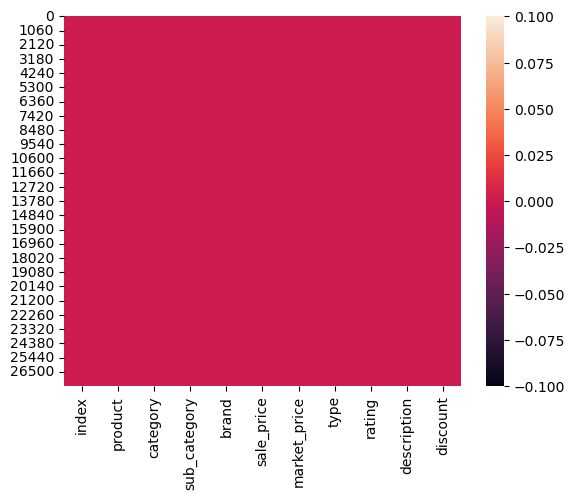

In [90]:
sns.heatmap(df.isnull())
plt.show()

Find out the outliers from the dataset according to columns and fill them with the mean

In [93]:
def handle_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Print the outliers
    print(f'Outliers in {column_name}:\n', outliers)

    # Clip the outliers
    df[column_name] = df[column_name].clip(lower_bound, upper_bound)

# Example usage for multiple columns
columns_to_check = ['market_price', 'sale_price', 'rating', 'discount']
for column in columns_to_check:
    handle_outliers(df, column)

Outliers in market_price:
        index                                            product  \
8          9  Biotin & Collagen Volumizing Hair Shampoo + Bi...   
34        35               Pet Solitaire Container Set - Silver   
96        97                    Hair Remover Spray - Foam Lemon   
99       100         Wonder Diaper Pants - Xtra Large, 12-17 Kg   
118      119           Adult Dry Cat Food - +1 Year, Ocean Fish   
...      ...                                                ...   
27488  27489                          Cranberry - Dried, Sliced   
27498  27499            Juicer - Fruit & Vegetable, Light Green   
27514  27515                     Verge & Sheer Perfume For Pair   
27538  27539  Quista Pro Advanced Whey Protein Formula forti...   
27542  27543                    Embellish Skin Lightening Serum   

                     category              sub_category            brand  \
8            Beauty & Hygiene                 Hair Care       StBotanica   
34     Kitchen, 

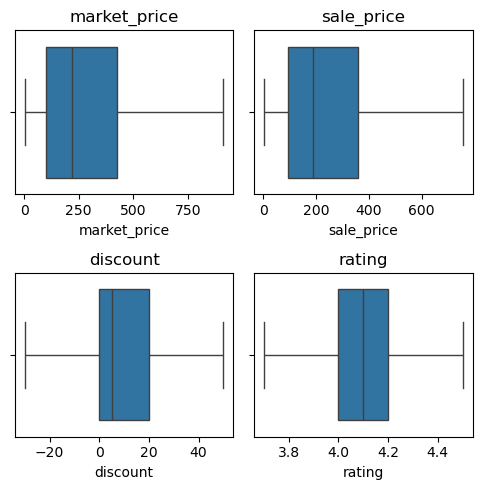

In [95]:
fig, axes = plt.subplots(2, 2, figsize=(5,5))
sns.boxplot(x=df['market_price'], ax=axes[0, 0])
axes[0, 0].set_title('market_price')

sns.boxplot(x=df['sale_price'], ax=axes[0, 1])
axes[0, 1].set_title('sale_price')


sns.boxplot(x=df['rating'], ax=axes[1, 1])
axes[1, 1].set_title('rating')

sns.boxplot(x=df['discount'], ax=axes[1, 0])
axes[1, 0].set_title('discount')

plt.tight_layout()
plt.show()

finding out top and amp. least sold products

In [97]:

top_sold = df.sort_values(by = 'sale_price', ascending = False).head()
top_sold

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
14445,14446,Svachh DLX Alpha Steel Outer Lid Pressure Cook...,"Kitchen, Garden & Pets",Cookware & Non Stick,Prestige,755.0,912.5,Pressure Cookers,4.1,The Prestige Dlexue Alpha Svachh pressure cook...,14.90
2180,2181,I'Brite Almond-Green Tea Nourishing Under Eye ...,Beauty & Hygiene,Skin Care,Just Herbs,755.0,912.5,Eye Care,4.1,"A firming and moisturizing under eye cream, th...",0.00
18165,18166,Premium Stainless Steel Dinner Set,"Kitchen, Garden & Pets",Steel Utensils,Neelam,755.0,912.5,Plates & Tumblers,3.7,No kitchen is complete without a stainless ste...,48.61
7686,7687,Vaporisateur Natural Spray Perfume - Jacques B...,Beauty & Hygiene,Fragrances & Deos,One man show,755.0,912.5,Body Sprays & Mists,4.1,Coconut oil is one of the versatile products o...,32.50
25254,25255,"Romance Aromatherapy Diffuser Oil - Orange, Ro...",Beauty & Hygiene,Skin Care,Oriental Botanics,755.0,899.0,Aromatherapy,4.1,Descend into the scent of a field of flowers w...,0.00


In [100]:
least_sold = df.sort_values(by = 'sale_price', ascending = True).head()
least_sold

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
26976,26977,Curry Leaves,Fruits & Vegetables,Herbs & Seasonings,Fresho,2.45,15.0,Indian & Exotic Herbs,4.1,"With dark green and glossy appearance, curry l...",50.0
21312,21313,Serum,Beauty & Hygiene,Hair Care,Livon,3.00,3.0,Hair Oil & Serum,3.7,"Instantly Softens and Smoothens Dry, Rough, Ta...",0.0
24671,24672,Fulltoss Thai Sriracha,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",Parle,5.00,5.0,Nachos & Chips,4.1,A snacking sensation which brings a little fla...,0.0
27413,27414,Layer Cake - Orange,"Bakery, Cakes & Dairy",Cakes & Pastries,Winkies,5.00,5.0,Tea Cakes & Slice Cakes,4.1,A generous spread of orange cream between two ...,0.0
2978,2979,Sugar Free Chewing Gum - Mixed Fruit,Snacks & Branded Foods,Chocolates & Candies,Orbit,5.00,5.0,Mints & Chewing Gum,4.2,There are occasions in everyone’s day when the...,0.0


Plot and visualization

C:\Users\aman\AppData\Local\Temp\ipykernel_18668\2901714892.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sale_price', y='product', data=top_sold, palette='viridis')


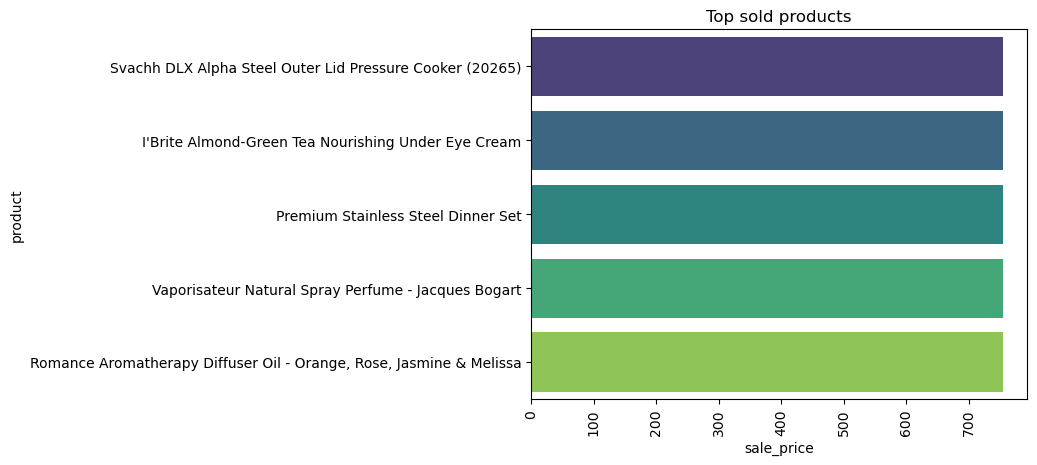

In [103]:
sns.barplot(x='sale_price', y='product', data=top_sold, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top sold products')
plt.show()

C:\Users\aman\AppData\Local\Temp\ipykernel_18668\2225419544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sale_price', y='product', data=least_sold, palette='Blues_r')


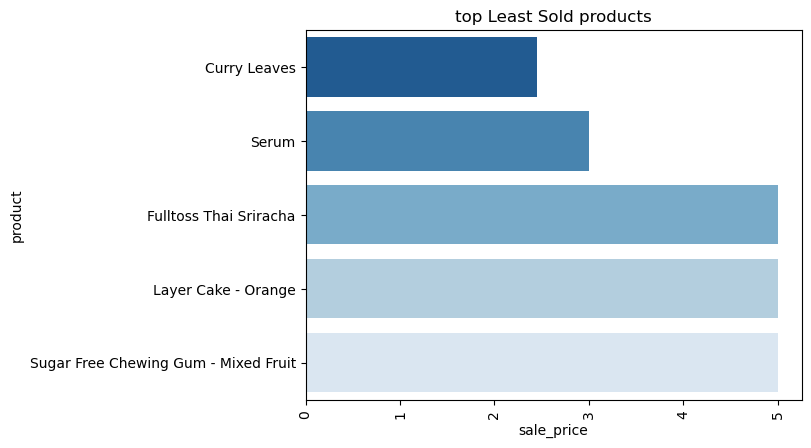

In [105]:
sns.barplot(x='sale_price', y='product', data=least_sold, palette='Blues_r')
plt.xticks(rotation=90)
plt.title('top Least Sold products')
plt.show()

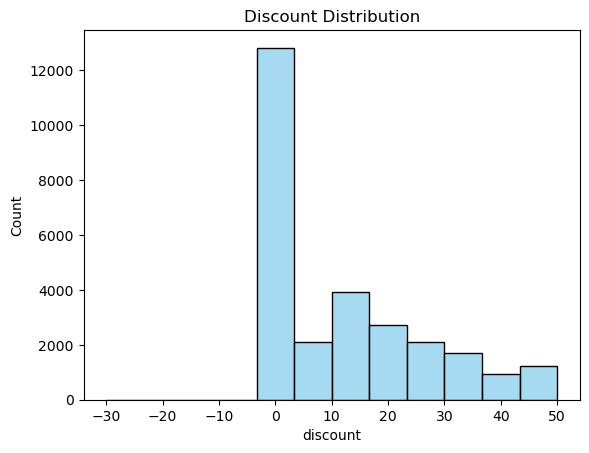

In [107]:
sns.histplot(df['discount'], bins=12, color='skyblue')
plt.title('Discount Distribution')
plt.show()

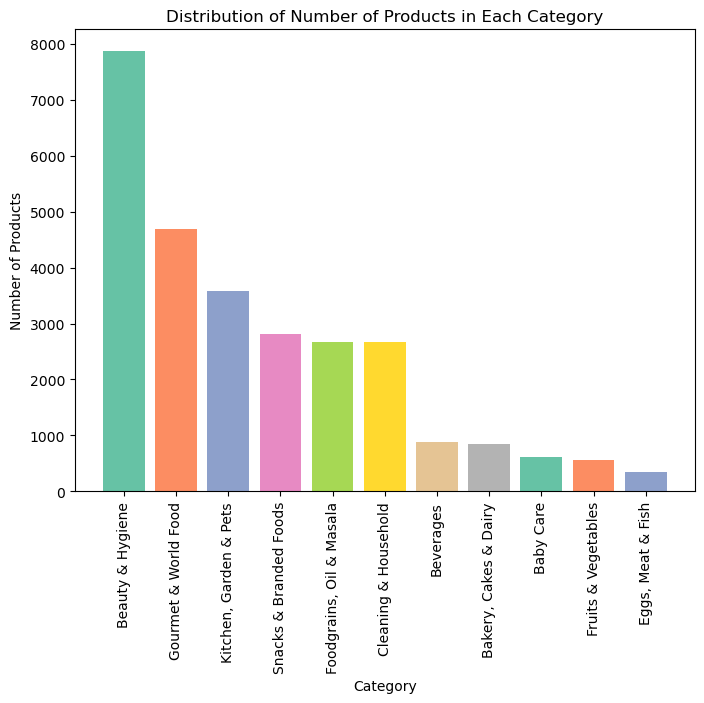

In [109]:
product_counts = df['category'].value_counts()

plt.figure(figsize=(8, 6))
sns.color_palette("Set2", len(product_counts))
plt.bar(product_counts.index, product_counts.values, color=sns.color_palette("Set2", len(product_counts)))
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Distribution of Number of Products in Each Category')
plt.xticks(rotation=90)
plt.show()

C:\Users\aman\AppData\Local\Temp\ipykernel_18668\976938444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette=colors)
C:\Users\aman\AppData\Local\Temp\ipykernel_18668\976938444.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette=colors)


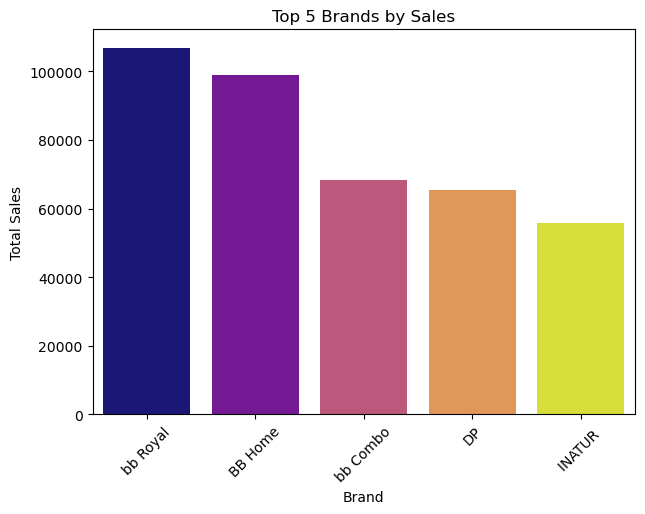

In [111]:
top_5_brands = df.groupby('brand')['sale_price'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(7, 5))
colors = plt.cm.plasma(np.linspace(0, 1, len(top_5_brands)))
sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette=colors)
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Top 5 Brands by Sales')
plt.xticks(rotation=45)
plt.show()

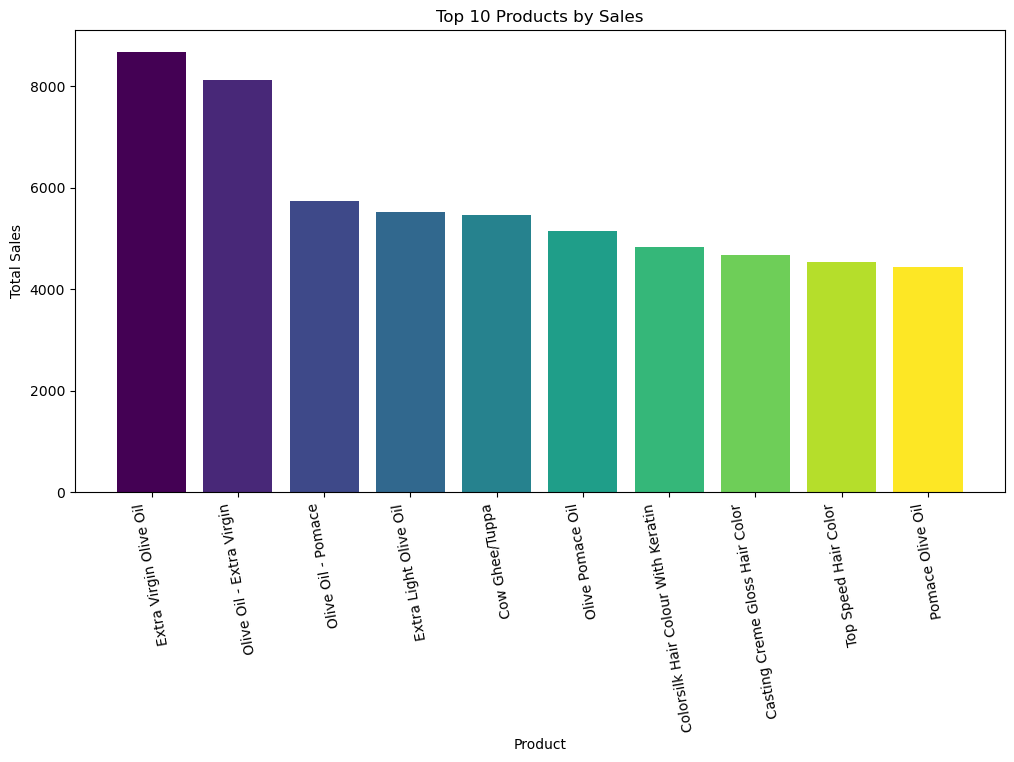

In [113]:
top_10_products = df.groupby('product')['sale_price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_products)))
plt.bar(top_10_products.index, top_10_products.values, color=colors)
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=100)
plt.show()


Key Takeways

C:\Users\aman\AppData\Local\Temp\ipykernel_18668\1165499652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette="Set1")


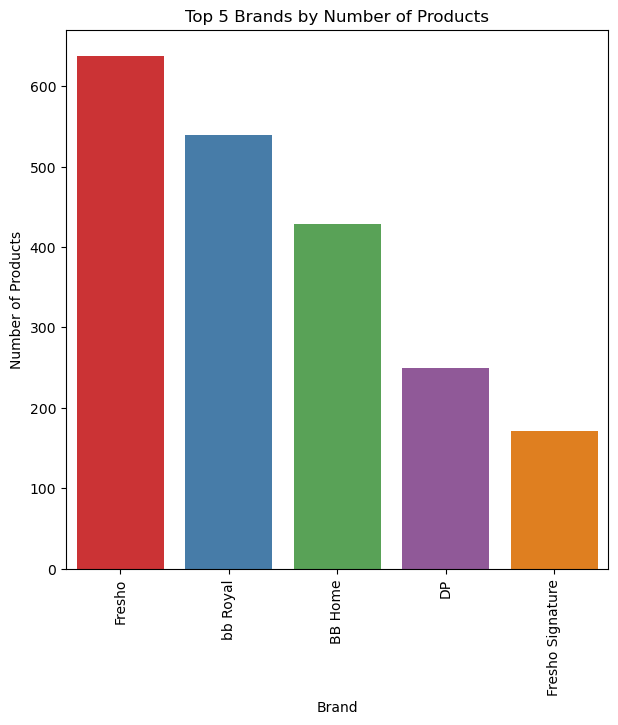

In [116]:
top_5_brands = df['brand'].value_counts().head(5)

plt.figure(figsize=(7, 7))
sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette="Set1")
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Top 5 Brands by Number of Products')
plt.xticks(rotation=90)
plt.show()

C:\Users\aman\AppData\Local\Temp\ipykernel_18668\989504097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette=["#FF6347", "#FF8C00", "#FFD700", "#ADFF2F", "#32CD32", "#20B2AA", "#8A2BE2", "#FF1493", "#00BFFF", "#FF69B4"])


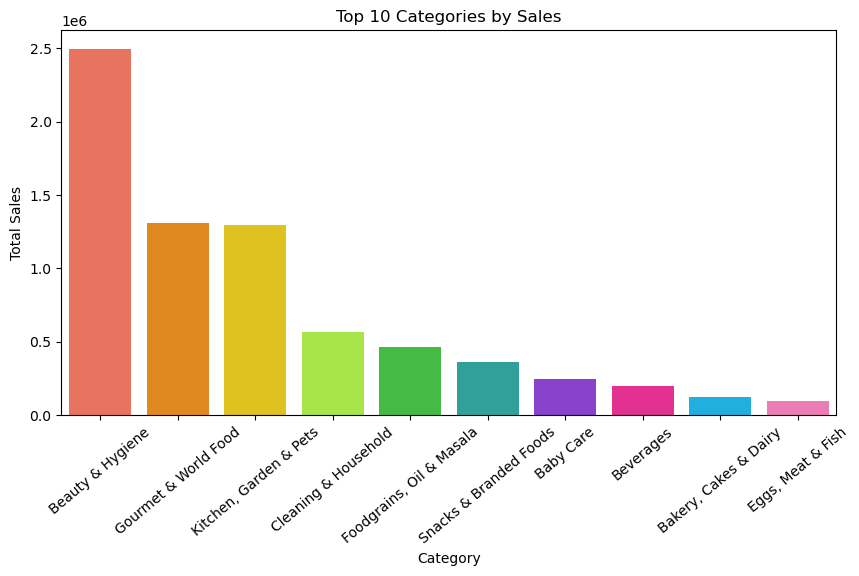

In [119]:
top_10_brands = df.groupby('category')['sale_price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette=["#FF6347", "#FF8C00", "#FFD700", "#ADFF2F", "#32CD32", "#20B2AA", "#8A2BE2", "#FF1493", "#00BFFF", "#FF69B4"])
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Top 10 Categories by Sales')
plt.xticks(rotation=40)
plt.show()

C:\Users\aman\AppData\Local\Temp\ipykernel_18668\2726404771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sub_category.index, y=top_10_sub_category.values, palette="Set1")


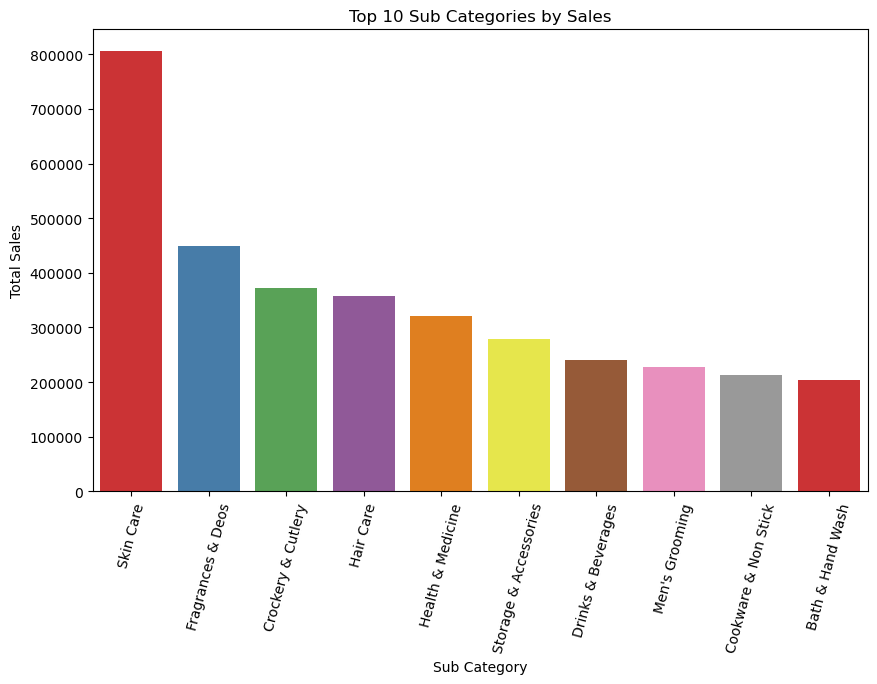

In [121]:
top_10_sub_category = df.groupby('sub_category')['sale_price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sub_category.index, y=top_10_sub_category.values, palette="Set1")
plt.xlabel('Sub Category')
plt.ylabel('Total Sales')
plt.title('Top 10 Sub Categories by Sales')
plt.xticks(rotation=75)
plt.show()

C:\Users\aman\AppData\Local\Temp\ipykernel_18668\317504015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="Set2")


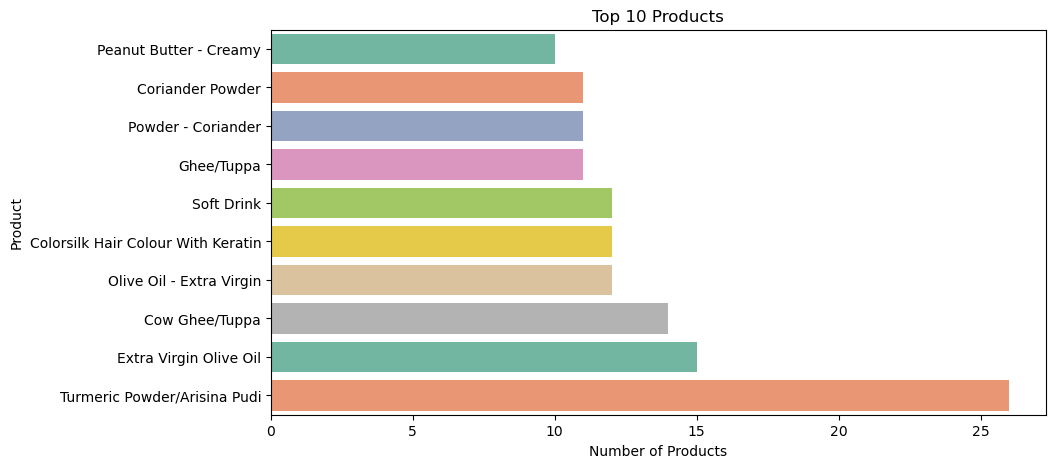

In [123]:
top_10_products = df['product'].value_counts().head(10).sort_values(ascending=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="Set2")
plt.xlabel('Number of Products')
plt.ylabel('Product')
plt.title('Top 10 Products')
plt.show()

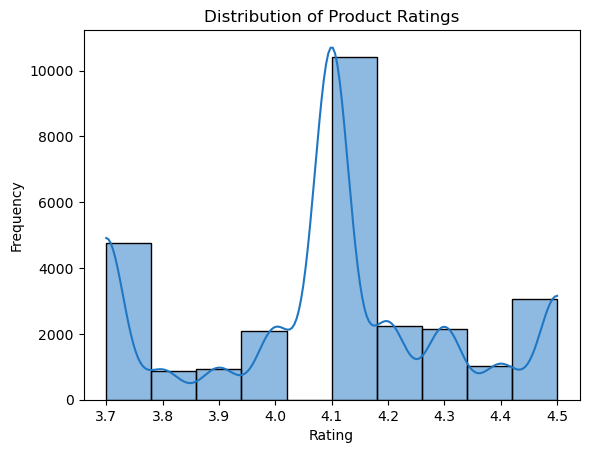

In [125]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

sns.histplot(df['rating'], bins=10, edgecolor='black', kde=True, color='#1f77c4')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()

C:\Users\aman\AppData\Local\Temp\ipykernel_18668\856748994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_product.index, y=top_10_product.values, palette="Set2")


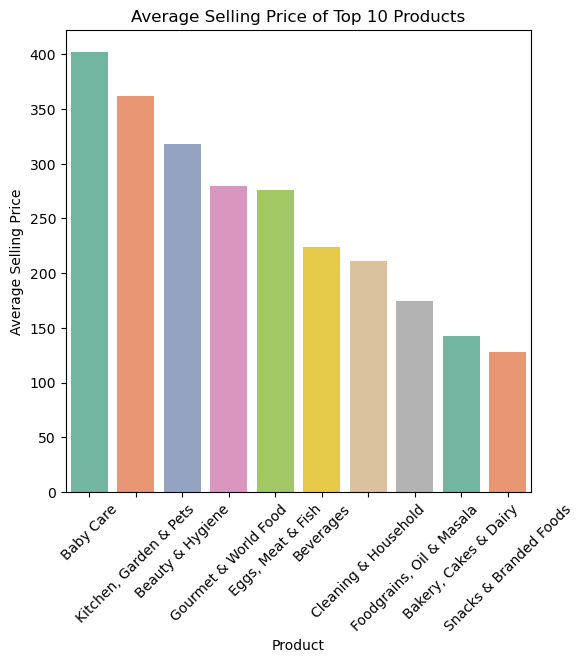

In [127]:
top_10_product = df.groupby('category')['sale_price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x=top_10_product.index, y=top_10_product.values, palette="Set2")
plt.xlabel('Product')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price of Top 10 Products')
plt.xticks(rotation=45)
plt.show()

In [129]:
 # Measuring discount on a certain item

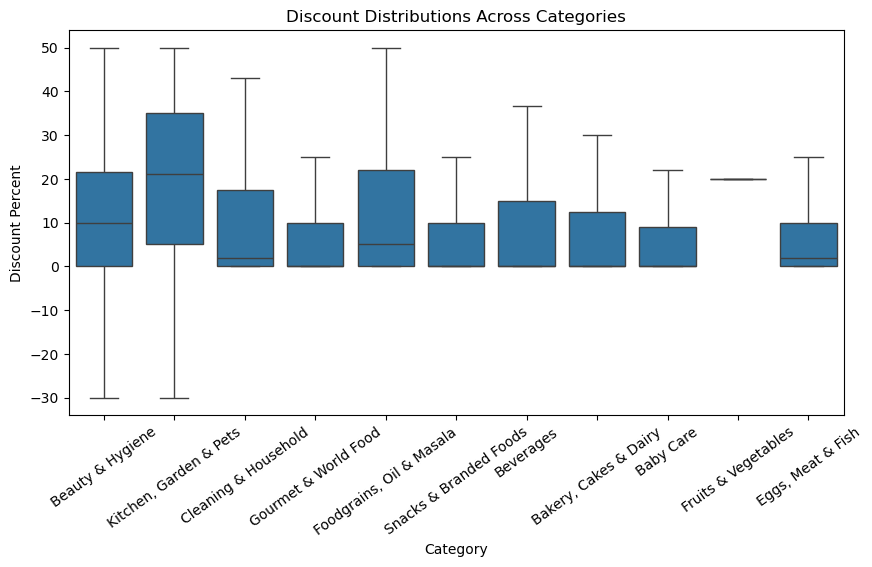

In [131]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='category', y='discount', data=df,showfliers=False)
plt.title('Discount Distributions Across Categories')
plt.xticks(rotation = 36)
plt.xlabel('Category')
plt.ylabel('Discount Percent')
plt.show()

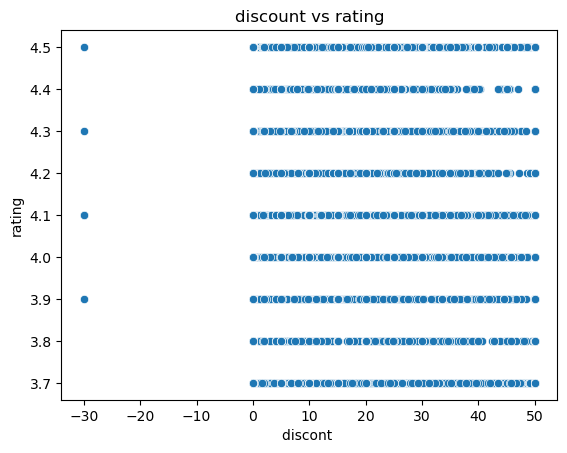

In [133]:
sns.scatterplot(x = 'discount', y = 'rating', data = df)
plt.xlabel('discont ')
plt.ylabel('rating')
plt.title('discount vs rating')

plt.show()